## HW4
Name: Pei Tian (pt2632)

In [1]:
# Load necessary packages
library(GLMsData)
library(ggplot2)
library(car)
library(MASS)

Warning message:
“package ‘GLMsData’ was built under R version 4.3.3”
Loading required package: carData



### Problem 1

In [2]:
data(trees)
head(trees)

,Girth,Height,Volume
,<dbl>,<dbl>,<dbl>
1,8.3,70,10.3
2,8.6,65,10.3
3,8.8,63,10.2
4,10.5,72,16.4
5,10.7,81,18.8
6,10.8,83,19.7


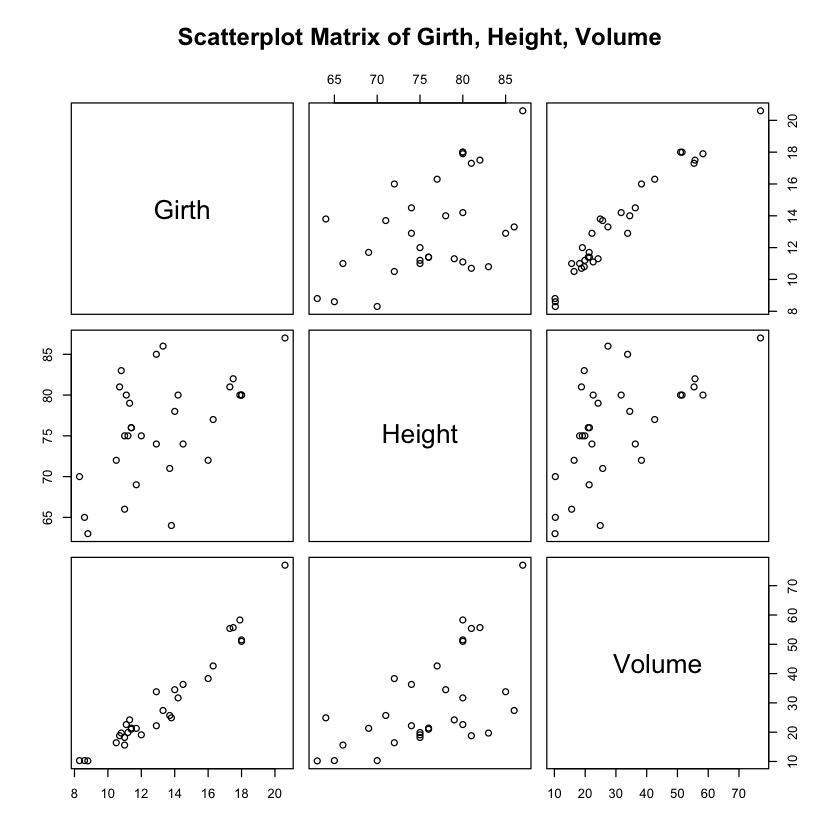

In [3]:
# a) Scatterplot matrix
pairs(trees, main = "Scatterplot Matrix of Girth, Height, Volume")

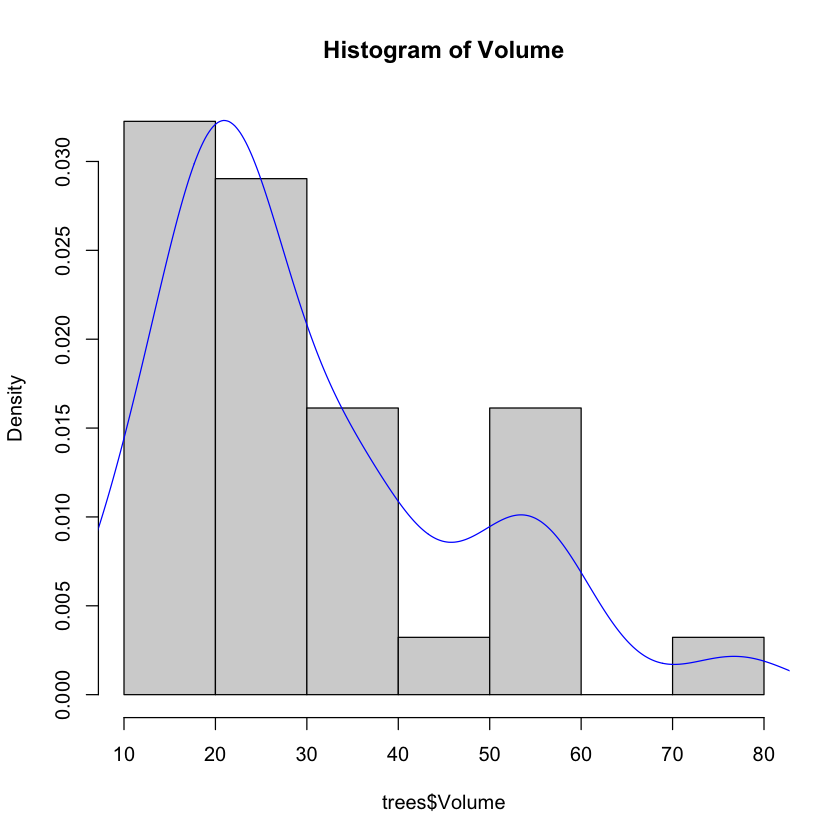


	Shapiro-Wilk normality test

data:  trees$Volume
W = 0.88757, p-value = 0.003579


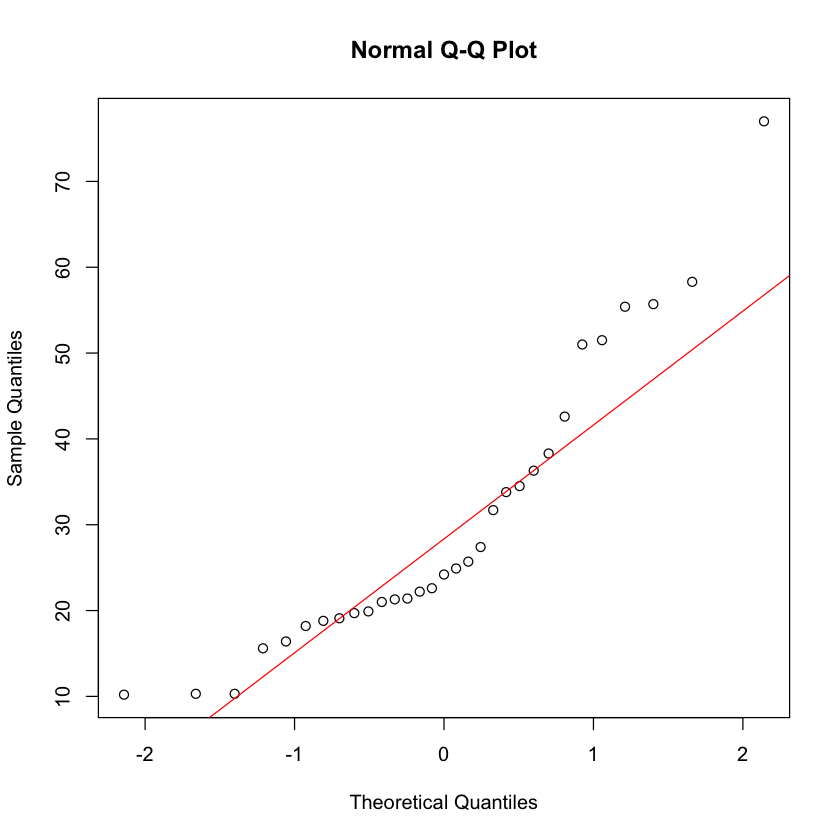

In [4]:
# b) Check normality of Volume
# Histogram with density plot
hist(trees$Volume, probability = TRUE, main = "Histogram of Volume")
lines(density(trees$Volume), col = "blue")

# Q-Q plot
qqnorm(trees$Volume)
qqline(trees$Volume, col = "red")

# Shapiro-Wilk test
shapiro.test(trees$Volume)

From the analysis above, we could conclude `Volume` follows normal distribution approximately given histogram and QQ plot. 
We cannot reject the null hypothesis (`Volume` is normally distributed) with 99% confidence under Shapiro-Wilk test.

In [5]:
# c) Transform to log scale and fit linear model
trees$logGirth <- log(trees$Girth)
trees$logHeight <- log(trees$Height)

lm_model <- lm(Volume ~ logGirth + logHeight, data = trees)
summary(lm_model)


Call:
lm(formula = Volume ~ logGirth + logHeight, data = trees)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.8190 -2.1355 -1.2785  0.9183 14.6848 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -234.888     53.925  -4.356 0.000161 ***
logGirth      61.269      5.058  12.114 1.19e-12 ***
logHeight     25.045     13.784   1.817 0.079946 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.487 on 28 degrees of freedom
Multiple R-squared:  0.896,	Adjusted R-squared:  0.8886 
F-statistic: 120.6 on 2 and 28 DF,  p-value: 1.734e-14


`log(Girth)` is significant predictor at $\alpha=0.05$, while `log(Height)` is not.

In [6]:
# d) Gamma GLM with only intercept
glm_d <- glm(Volume ~ 1, family = Gamma(link = "log"), data = trees)
cat("Deviance of the model (d) is:", deviance(glm_d), "\n")

Deviance of the model (d) is: 8.317201 


In [7]:
# e) Gamma GLM with log(Girth)
glm_e <- glm(Volume ~ logGirth, family = Gamma(link = "log"), data = trees)
cat("Deviance of the model (e) is:", deviance(glm_e), "\n")

Deviance of the model (e) is: 0.3840839 


In [8]:
# f) Gamma GLM with log(Girth) and log(Height)
glm_f <- glm(Volume ~ logGirth + logHeight, family = Gamma(link = "log"), data = trees)
cat("Deviance of the model (f) is:", deviance(glm_f), "\n")

Deviance of the model (f) is: 0.1835153 


In [9]:
# g) F-test: Compare e vs d
phi_hat_g <- summary(glm_e)$dispersion
f_stat_g <- (deviance(glm_d) - deviance(glm_e)) / (2 - 1) / phi_hat_g
df1_g <- 1
df2_g <- glm_e$df.residual
p_value_g <- pf(f_stat_g, df1_g, df2_g, lower.tail = FALSE)

cat("F-test comparing glm_e to glm_d:\n")
cat("F-statistic:", f_stat_g, "\n")
cat("p-value:", p_value_g, "\n\n")

F-test comparing glm_e to glm_d:
F-statistic: 593.7235 
p-value: 7.314103e-21 



In [10]:
# h) F-test: Compare f vs e
phi_hat_h <- summary(glm_f)$dispersion
f_stat_h <- (deviance(glm_e) - deviance(glm_f)) / (3 - 2) / phi_hat_h
df1_h <- 1
df2_h <- glm_f$df.residual
p_value_h <- pf(f_stat_h, df1_h, df2_h, lower.tail = FALSE)

cat("F-test comparing glm_f to glm_e:\n")
cat("F-statistic:", f_stat_h, "\n")
cat("p-value:", p_value_h, "\n\n")

F-test comparing glm_f to glm_e:
F-statistic: 31.2058 
p-value: 5.603663e-06 



In linear regression model, `log(Girth)` is significant predictor at $\alpha=0.05$, while `log(Height)` is not.

In Gamma regression model, Each step (adding `log(Girth)`, and then `log(Height)`)significantly improves the model fit at $\alpha=0.05$.

### Problem 2

#### 2a

In [11]:
# a)
# Input the data
X <- c(2, 2, 0.667, 0.667, 0.4, 0.4, 0.286, 0.286, 0.222, 0.222, 0.2, 0.2)
Y <- c(0.0615, 0.0527, 0.0344, 0.0258, 0.0138, 0.0258, 0.0129, 0.0183, 0.0083, 0.0169, 0.0129, 0.0087)

# Transform data
Y_star <- 1 / Y
X_star <- 1 / X

# Fit linear model
lm_model <- lm(Y_star ~ X_star)
summary(lm_model)

# Extract coefficients
b0 <- coef(lm_model)[1]
b1 <- coef(lm_model)[2]

g1_start <- 1 / b0
g2_start <- b1 / b0


Call:
lm(formula = Y_star ~ X_star)

Residuals:
    Min      1Q  Median      3Q     Max 
-28.624 -14.203   0.225  10.193  32.686 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)    8.602     11.303   0.761  0.46418    
X_star        17.581      3.401   5.169  0.00042 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 18.76 on 10 degrees of freedom
Multiple R-squared:  0.7277,	Adjusted R-squared:  0.7004 
F-statistic: 26.72 on 1 and 10 DF,  p-value: 0.0004196


In [12]:
cat("g1_start =", g1_start, "\n")
cat("g2_start =", g2_start, "\n")

g1_start = 0.1162497 
g2_start = 2.04378 


#### 2b

In [13]:
# Fit the nonlinear model with starting value in a)
start_vals <- list(g1 = g1_start, g2 = g2_start)
nonlinear_model <- nls(Y ~ (g1 * X) / (g2 + X), start = start_vals)
summary(nonlinear_model)


Formula: Y ~ (g1 * X)/(g2 + X)

Parameters:
   Estimate Std. Error t value Pr(>|t|)    
g1   0.1050     0.0176   5.965 0.000138 ***
g2   1.6748     0.4728   3.542 0.005338 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.004574 on 10 degrees of freedom

Number of iterations to convergence: 3 
Achieved convergence tolerance: 1.143e-06


Fitted equation: $Y = \frac{0.1050X}{1.6748 + X}$

#### 2c
**Interpretation:** 

g1 = 0.1050: Represents the maximum rate of increase.

g2 = 1.6748: The value of X where the response is half of its maximum.

Since both p-values < 0.01, both parameters are statistically significant at the 0.05 level.



#### 2d

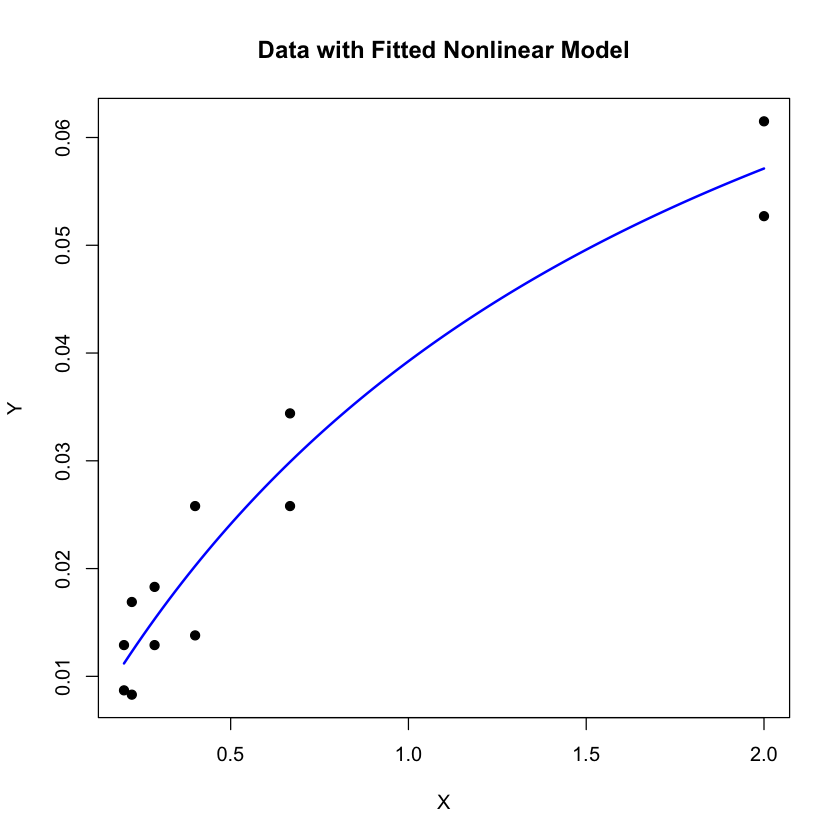

In [14]:
# Step 7: Plot with fitted curve
g1_hat <- coef(nonlinear_model)["g1"]
g2_hat <- coef(nonlinear_model)["g2"]
plot(X, Y, main = "Data with Fitted Nonlinear Model", xlab = "X", ylab = "Y", pch = 19)
curve((g1_hat * x) / (g2_hat + x), col = "blue", add = TRUE, lwd = 2)

The model appears to be adequate based on the plot. It captures the nonlinear trend and provides a visually good fit to the data. There is some deviation for certain points, but overall, the model captures the shape of the relationship quite well.

#### 2e

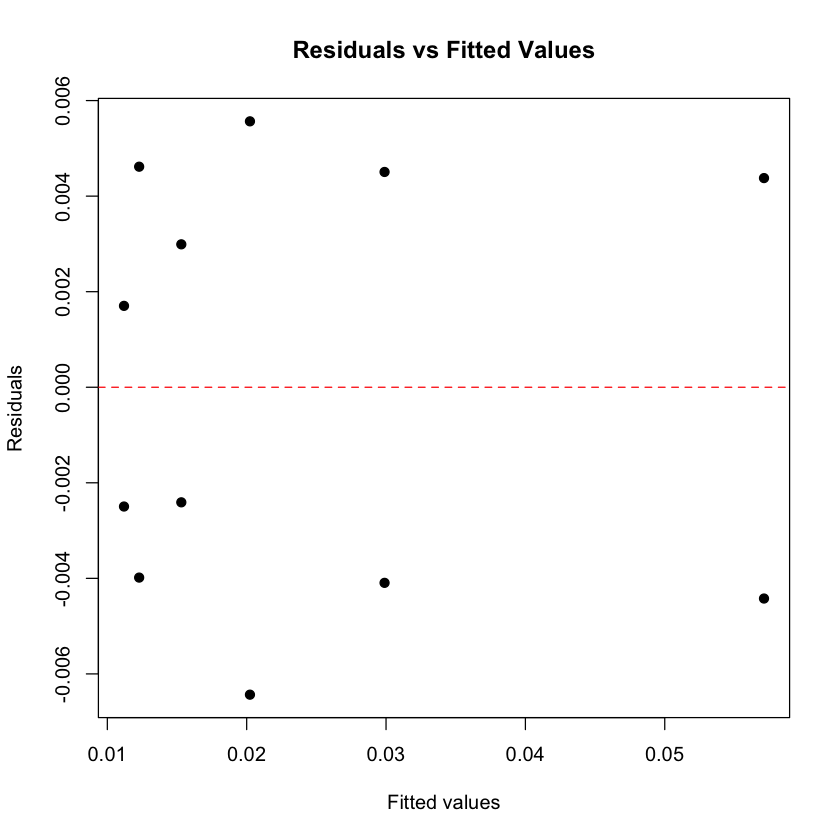

In [15]:
# Residual analysis
fitted_vals <- predict(nonlinear_model)
residuals <- Y - fitted_vals

# Plot residuals vs fitted
plot(fitted_vals, residuals, pch = 19,
     xlab = "Fitted values", ylab = "Residuals",
     main = "Residuals vs Fitted Values")
abline(h = 0, col = "red", lty = 2)

The residual plot shows points scattered around zero. This means the model fits the data fairly well and our normal distribution assumption for the error term is reasonable.



### Problem 3

#### 3a
$$
\mathbb{E}[\boldsymbol{Y}] = \mathbb{E}[\boldsymbol{X\beta} + \boldsymbol{\epsilon}] = \boldsymbol{X\beta} + \mathbb{E}[\boldsymbol{\epsilon}] = \boldsymbol{X\beta}, \text{Cov}(\boldsymbol{Y}) = \text{Cov}(\boldsymbol{\epsilon}) = \sigma^2 \boldsymbol{V}
$$
$$
\mathbb{E}[\boldsymbol{\hat{\beta}}_{GLS}] = \mathbb{E}[(\boldsymbol{X}^T\boldsymbol{V}^{-1}\boldsymbol{X})^{-1}\boldsymbol{X}^T\boldsymbol{V}^{-1}\boldsymbol{Y}] = (\boldsymbol{X}^T\boldsymbol{V}^{-1}\boldsymbol{X})^{-1}\boldsymbol{X}^T\boldsymbol{V}^{-1}\mathbb{E}[\boldsymbol{Y}] = (\boldsymbol{X}^T\boldsymbol{V}^{-1}\boldsymbol{X})^{-1}\boldsymbol{X}^T\boldsymbol{V}^{-1}\boldsymbol{X\beta}
$$

Given $\boldsymbol{V}$ is symmetric, so $(\boldsymbol{V}^{-1})^T = \boldsymbol{V^{-1}}$, similar result holds true for symmetric matrix $(\boldsymbol{X}^T\boldsymbol{V}^{-1}\boldsymbol{X})^{-1}$. 

$$
\begin{split}
\text{Cov}(\boldsymbol{\hat{\beta}}_{GLS}) &= (\boldsymbol{X}^T\boldsymbol{V}^{-1}\boldsymbol{X})^{-1}\boldsymbol{X}^T\boldsymbol{V}^{-1}\text{Cov}(\boldsymbol{Y})\boldsymbol{V}^{-1}\boldsymbol{X}(\boldsymbol{X}^T\boldsymbol{V}^{-1}\boldsymbol{X})^{-1} \\&= \sigma^2(\boldsymbol{X}^T\boldsymbol{V}^{-1}\boldsymbol{X})^{-1}\boldsymbol{X}^T\boldsymbol{V}^{-1}\boldsymbol{V}\boldsymbol{V}^{-1}\boldsymbol{X}(\boldsymbol{X}^T\boldsymbol{V}^{-1}\boldsymbol{X})^{-1} = \sigma^2(\boldsymbol{X}^T\boldsymbol{V}^{-1}\boldsymbol{X})^{-1}
\end{split}
$$

#### 3b
Given the analysis above, we have $\text{Cov}(\boldsymbol{\hat{\beta}}_{OLS}) = \sigma^2(\boldsymbol{X}^T\boldsymbol{X})^{-1}$.

For simple linear regression model where $\overline{x} = 0$, we have
$$
\boldsymbol{X} = 
\begin{bmatrix}
1 & x_1\\
1 & x_2 \\
\vdots & \vdots\\
1 & x_n
\end{bmatrix}, 
\boldsymbol{X^T\boldsymbol{X}} = \begin{bmatrix}
n & \sum_{i=1}^nx_i\\
\sum_{i=1}^nx_i & \sum_{i=1}^nx_i^2 \\
\end{bmatrix} = \begin{bmatrix}
n & 0\\
0 & \sum_{i=1}^nx_i^2 \\
\end{bmatrix} \Rightarrow 
(\boldsymbol{X^T\boldsymbol{X}})^{-1} = 
\begin{bmatrix}
\frac{1}{n} & 0\\
0 & \frac{1}{\sum_{i=1}^nx_i^2} \\
\end{bmatrix}
$$
Therefore, $\text{Cov}(\hat{\beta}_0, \hat{\beta}_1) = 0$

#### 3c
$$
\boldsymbol{\hat{\beta}}_{OLS} = (\boldsymbol{X}^T\boldsymbol{X})^{-1}\boldsymbol{X}^T\boldsymbol{Y} = (\boldsymbol{X}^T\boldsymbol{X})^{-1}\boldsymbol{X}^T(\boldsymbol{X}\boldsymbol{\beta} + \boldsymbol{\epsilon}) = \boldsymbol{\beta} + (\boldsymbol{X}^T\boldsymbol{X})^{-1}\boldsymbol{X}^T\boldsymbol{\epsilon}
$$

$$
\mathbb{E}[\boldsymbol{\hat{\beta}}_{OLS}] = \mathbb{E}[\boldsymbol{\beta} + (\boldsymbol{X}^T\boldsymbol{X})^{-1}\boldsymbol{X}^T\boldsymbol{\epsilon}] = \boldsymbol{\beta} + (\boldsymbol{X}^T\boldsymbol{X})^{-1}\boldsymbol{X}^T\mathbb{E}[\boldsymbol{\epsilon}] = \boldsymbol{\beta} \\ \Rightarrow \text{Bias}(\boldsymbol{\hat{\beta}}_{OLS}) = \mathbb{E}[\boldsymbol{\hat{\beta}}_{OLS}] - \boldsymbol{\beta} = 0
$$

$$
\begin{split}
\text{Cov}(\boldsymbol{\hat{\beta}}_{OLS}) &= (\boldsymbol{X}^T\boldsymbol{X})^{-1}\boldsymbol{X}^T\text{Cov}(\boldsymbol{Y})\boldsymbol{X}(\boldsymbol{X}^T\boldsymbol{X})^{-1} \\&= \sigma^2(\boldsymbol{X}^T\boldsymbol{X})^{-1}\boldsymbol{X}^T\boldsymbol{V}\boldsymbol{X}(\boldsymbol{X}^T\boldsymbol{X})^{-1} 
\end{split}
$$

### Problem 4

In [23]:
# Function to run the simulation for a given gamma, beta1, and sample size n
run_simulation <- function(gamma, beta1, n, R = 100000, beta0 = 10) {
  set.seed(549)  # Step a: set seed and simulate x
  x <- rnorm(n)
  x_mean <- mean(x)
  # cat("Average x for n =", n, ":", round(x_mean, 4), "\n")

  # Initialize matrix to store beta0_hat and beta1_hat
  beta_hat_mat <- matrix(0, nrow = R, ncol = 2)

  for (r in 1:R) {
    # Step b: compute heteroscedastic errors
    error_sd <- exp(gamma * x / 2)
    epsilon <- rnorm(n, mean = 0, sd = error_sd)
    y <- beta0 + beta1 * x + epsilon

    # Step c: estimate coefficients
    model <- lm(y ~ x)
    beta_hat_mat[r, ] <- coef(model)
  }

  # Step e: compute averages
  beta0_avg <- mean(beta_hat_mat[, 1])
  beta1_avg <- mean(beta_hat_mat[, 2])

  # cat("γ =", gamma, "| β1 =", beta1, "| n =", n, "\n")
  # cat("Average β̂₀:", round(beta0_avg, 4), " | Bias:", round(beta0_avg - beta0, 4), "\n")
  # cat("Average β̂₁:", round(beta1_avg, 4), " | Bias:", round(beta1_avg - beta1, 4), "\n\n")

  return(data.frame(gamma = gamma, beta1 = beta1, n = n, x_mean = x_mean,
                    avg_beta0_hat = beta0_avg, avg_beta1_hat = beta1_avg,
                    beta0_bias = beta0_avg - beta0, beta1_bias = beta1_avg - beta1))
}

In [33]:
# Parameters to test
gammas <- c(0, 0.5, 1, 2)
beta1s <- c(0, 0.5, 1, 2)
ns <- c(10, 25, 50, 100)

# Run for a few selected combinations (can expand later)
results <- data.frame()
combinations <- expand.grid(gamma = gammas, beta1 = beta1s, n = ns)

for (i in 1:nrow(combinations)) {
  res <- run_simulation(combinations$gamma[i], combinations$beta1[i], combinations$n[i])
  results <- rbind(results, res)
}

In [26]:
results

gamma,beta1,n,x_mean,avg_beta0_hat,avg_beta1_hat,beta0_bias,beta1_bias
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.0,0.0,10,0.1626091,9.999943,-0.0001940545,-5.683712e-05,-0.0001940545
0.5,0.0,10,0.1626091,9.999888,-0.0002706257,-1.120046e-04,-0.0002706257
1.0,0.0,10,0.1626091,9.999810,-0.0003760334,-1.899806e-04,-0.0003760334
2.0,0.0,10,0.1626091,9.999546,-0.0008119007,-4.544709e-04,-0.0008119007
0.0,0.5,10,0.1626091,9.999943,0.4998059455,-5.683712e-05,-0.0001940545
0.5,0.5,10,0.1626091,9.999888,0.4997293743,-1.120046e-04,-0.0002706257
1.0,0.5,10,0.1626091,9.999810,0.4996239666,-1.899806e-04,-0.0003760334
2.0,0.5,10,0.1626091,9.999546,0.4991880993,-4.544709e-04,-0.0008119007
0.0,1.0,10,0.1626091,9.999943,0.9998059455,-5.683712e-05,-0.0001940545


In [32]:
cat("max bias for beta0: ", max(abs(results$beta0_bias)), "\n")
cat("max bias for beta1: ", max(abs(results$beta1_bias)))

max bias for beta0:  0.001487226 
max bias for beta1:  0.00300988

**Summary:**

From the simulation results above, we could obverse that the estimation of both $\beta_0$ and $\beta_1$ are nearly unbiased. So OLS estimator is acceptable in this simulation setup.